# Problem 1.2
Part A

In [54]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from scipy.stats import multivariate_normal
import pandas as pd
from random import random
from sklearn import metrics
correct = 0
# Defining perameters
rng = np.random.default_rng()
mean1 = (0,0,0)
cov1 = np.array([[4,0,0], [0,4,0], [0,0,4]])

mean2 = (4,0,0)
cov2 = np.array([[4,0,0], [0,4,0], [0,0,4]])

mean3 = (0, 3.464, 0)
cov3 = np.array([[8,0,0], [0,8,0], [0,0,8]])

mean4 = (4, 3.464, 0)
cov4 = np.array([[8,0,0], [0,8,0], [0,0,8]])


prior1 = 0.3
prior2 = 0.3
prior3a = 0.2 
prior3b = 0.2 
prior3 = 0.4

In [55]:
randoms = [] # contains all the random testing values. 
rnd1 = [] # for testing
rnd2 = [] # for testing
rnd3 = [] # for testing
rnd4 = [] # for testing


# takes into account and splits up the data using the priors
# keeps track of the classifers (0 and 1)
for i in range(10000):
  rnd = random() # insert random value between 0 and 1 
  if rnd <= 0.3 :
    rnd1.append(rnd)
    randoms.append([rnd,1])
  if rnd > 0.3 and rnd <= 0.6:
    rnd2.append(rnd)
    randoms.append([rnd,2])
  if rnd > 0.6 and rnd <= 0.8:
    rnd3.append(rnd)
    randoms.append([rnd,3])
  if rnd > 0.8 and rnd <= 1:
    rnd4.append(rnd)
    randoms.append([rnd,4])

randoms = np.array(randoms)

# okay, now lets finally generate the X values 
X = [] # Completed 3 vector dataset 
x1 = [] # testing
x2 = [] # testing
x3 = [] # testing
x4 = [] # testing
Xi = [] # array containing the classification of the data
for i in range(len(randoms)):
  if randoms[i, 1] == 1:
    x1.append(rng.multivariate_normal(mean1, cov1))
    X.append(rng.multivariate_normal(mean1, cov1))
    Xi.append(1)
  if randoms[i, 1] == 2:
    x2.append(rng.multivariate_normal(mean2, cov2))
    X.append(rng.multivariate_normal(mean2, cov2))
    Xi.append(2)
  if randoms[i, 1] == 3:
    x3.append(rng.multivariate_normal(mean3, cov3))
    X.append(rng.multivariate_normal(mean3, cov3))
    Xi.append(3)
  if randoms[i, 1] == 4:
    x4.append(rng.multivariate_normal(mean4, cov4))
    X.append(rng.multivariate_normal(mean4, cov4))
    Xi.append(4)
X = np.array(X)
# data has been generated and classified - stored in 2 data buckets X and Xi (classifier)

In [56]:
# Lets do some classification 
pdfx1 = multivariate_normal.pdf(X, mean1, cov1)
pdfx2 = multivariate_normal.pdf(X, mean2, cov2)
pdfx3 = multivariate_normal.pdf(X, mean3, cov3)
pdfx4 = multivariate_normal.pdf(X, mean4, cov4)

Xguess = []
for i in range(len(Xi)):
    R1 = (pdfx2[i] * prior2) + (pdfx3[i] * prior3a)+ (pdfx3[i] * prior3a) + (pdfx4[i] * prior3b)
    R2 = (pdfx1[i] * prior1) + (pdfx3[i] * prior3a)+ (pdfx3[i] * prior3a) + (pdfx4[i] * prior3b)
    R3 = (pdfx1[i] * prior1) + (pdfx2[i] * prior2) + (pdfx4[i] * prior3b)
    R4 = (pdfx1[i] * prior1) + (pdfx2[i] * prior2) + (pdfx3[i] * prior3a)
    
    if min([R1,R2,R3,R4]) == R1:
        Xguess.append(1)
    if min([R1,R2,R3,R4]) == R2:
        Xguess.append(2)
    if min([R1,R2,R3,R4]) == R3:
        Xguess.append(3)
    if min([R1,R2,R3,R4]) == R4:
        Xguess.append(4)
# Thats is, thats the data created and classified 

In [58]:
# lets create the confusion matrix
Xguess_scaled = Xguess
Xi_scaled = Xi
Xi_scaled = np.array(Xi_scaled)
Xguess_scaled = np.array(Xguess_scaled)

Xguess_scaled[Xguess_scaled == 4] = 3
Xi_scaled[Xi_scaled == 4] = 3

confusion_matrix = metrics.confusion_matrix(Xi_scaled, Xguess_scaled)

display(confusion_matrix)


array([[2002,  446,  555],
       [ 394, 2166,  371],
       [ 470,  609, 2987]])

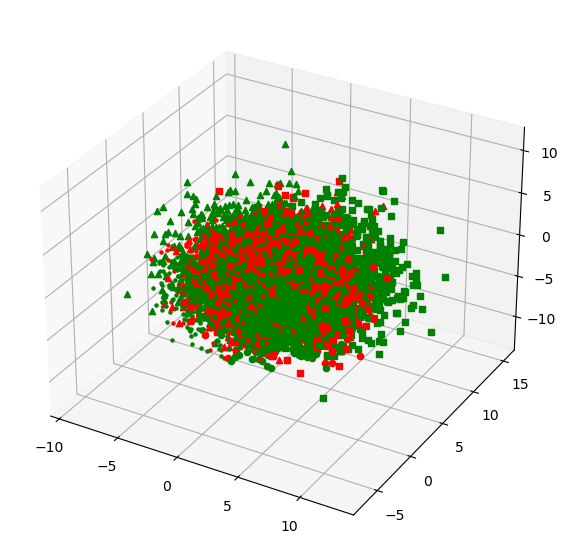

In [59]:
# Lets plot the Data 
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
correct = 0

def mark(slice_no):
    if Xi[slice_no] == 1: 
        return '.'
    if Xi[slice_no] == 2: 
        return 'o'
    if Xi[slice_no] == 3: 
        return '^'
    if Xi[slice_no] == 4: 
        return 's'


def iscorrect(slice_no):
    if Xi[slice_no] == Xguess[slice_no]:
        return 'green'
    if Xi[slice_no] != Xguess[slice_no]:
        return 'red'

for i in range(len(Xi)):
    ax.scatter3D(X[i,0], X[i,1], X[i,2], marker = mark(i), color = iscorrect(i))


**Part** B

**For risk --> 10x**

array([[ 230,   32, 2741],
       [  27,  242, 2662],
       [  19,   16, 4031]])

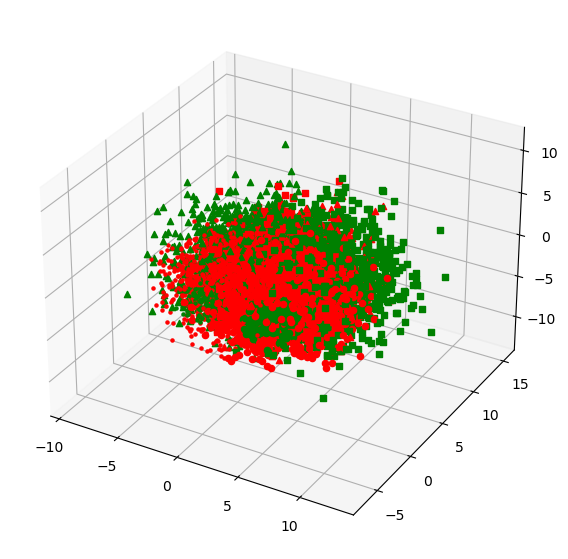

In [61]:
Xguess = []
for i in range(len(Xi)):
    R1 = (pdfx2[i] * prior2) + (pdfx3[i] * prior3a)+ (10* pdfx3[i] * prior3a) + (10* pdfx4[i] * prior3b)
    R2 = (pdfx1[i] * prior1) + (pdfx3[i] * prior3a)+ (10* pdfx3[i] * prior3a) + (10* pdfx4[i] * prior3b)
    R3 = (pdfx1[i] * prior1) + (pdfx2[i] * prior2) + (pdfx4[i] * prior3b)
    R4 = (pdfx1[i] * prior1) + (pdfx2[i] * prior2) + (pdfx3[i] * prior3a)
    
    if min([R1,R2,R3,R4]) == R1:
        Xguess.append(1)
    if min([R1,R2,R3,R4]) == R2:
        Xguess.append(2)
    if min([R1,R2,R3,R4]) == R3:
        Xguess.append(3)
    if min([R1,R2,R3,R4]) == R4:
        Xguess.append(4)
Xguess_scaled = Xguess
Xi_scaled = Xi
Xi_scaled = np.array(Xi_scaled)
Xguess_scaled = np.array(Xguess_scaled)

Xguess_scaled[Xguess_scaled == 4] = 3
Xi_scaled[Xi_scaled == 4] = 3

confusion_matrix = metrics.confusion_matrix(Xi_scaled, Xguess_scaled)

display(confusion_matrix)

# Lets plot the Data 
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
correct = 0

def mark(slice_no):
    if Xi[slice_no] == 1: 
        return '.'
    if Xi[slice_no] == 2: 
        return 'o'
    if Xi[slice_no] == 3: 
        return '^'
    if Xi[slice_no] == 4: 
        return 's'


def iscorrect(slice_no):
    if Xi[slice_no] == Xguess[slice_no]:
        return 'green'
    if Xi[slice_no] != Xguess[slice_no]:
        return 'red'

for i in range(len(Xi)):
    ax.scatter3D(X[i,0], X[i,1], X[i,2], marker = mark(i), color = iscorrect(i))

**For risk --> 100x**

array([[   0,    0, 3003],
       [   0,    0, 2931],
       [   0,    0, 4066]])

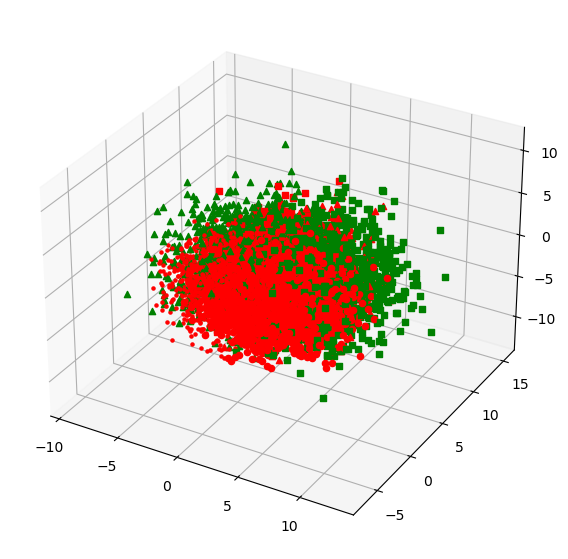

In [62]:
Xguess = []
for i in range(len(Xi)):
    R1 = (pdfx2[i] * prior2) + (pdfx3[i] * prior3a)+ (100* pdfx3[i] * prior3a) + (100* pdfx4[i] * prior3b)
    R2 = (pdfx1[i] * prior1) + (pdfx3[i] * prior3a)+ (100* pdfx3[i] * prior3a) + (100* pdfx4[i] * prior3b)
    R3 = (pdfx1[i] * prior1) + (pdfx2[i] * prior2) + (pdfx4[i] * prior3b)
    R4 = (pdfx1[i] * prior1) + (pdfx2[i] * prior2) + (pdfx3[i] * prior3a)
    
    if min([R1,R2,R3,R4]) == R1:
        Xguess.append(1)
    if min([R1,R2,R3,R4]) == R2:
        Xguess.append(2)
    if min([R1,R2,R3,R4]) == R3:
        Xguess.append(3)
    if min([R1,R2,R3,R4]) == R4:
        Xguess.append(4)
Xguess_scaled = Xguess
Xi_scaled = Xi
Xi_scaled = np.array(Xi_scaled)
Xguess_scaled = np.array(Xguess_scaled)

Xguess_scaled[Xguess_scaled == 4] = 3
Xi_scaled[Xi_scaled == 4] = 3

confusion_matrix = metrics.confusion_matrix(Xi_scaled, Xguess_scaled)

display(confusion_matrix)

# Lets plot the Data 
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
correct = 0

def mark(slice_no):
    if Xi[slice_no] == 1: 
        return '.'
    if Xi[slice_no] == 2: 
        return 'o'
    if Xi[slice_no] == 3: 
        return '^'
    if Xi[slice_no] == 4: 
        return 's'


def iscorrect(slice_no):
    if Xi[slice_no] == Xguess[slice_no]:
        return 'green'
    if Xi[slice_no] != Xguess[slice_no]:
        return 'red'

for i in range(len(Xi)):
    ax.scatter3D(X[i,0], X[i,1], X[i,2], marker = mark(i), color = iscorrect(i))